# This notebook creates visualizations for the Barnes-Hut Simulation paper with Andrew Thompson and Travis Waters.

In [2]:
# import libraries
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import scipy.stats as stats
import astropy.units as u

# create paths
png_path = "/home/shawn/Desktop/galaxy_sim/visuals/png/"
pdf_path = '/home/shawn/Desktop/galaxy_sim/visuals/pdf/'
csv_path = '/home/shawn/Desktop/galaxy_sim/files/csv/'

# 11/20/20 - Show $\alpha$, the ratio of $v_{rot}/v_{rand}$.

In [24]:
# create arrays for values of mean radius, omega, mean velocity, and N

mean_radius = np.array([4.0, 8.0, 12.0, 16.0]) #kpc
omega = np.array([0.1, 0.15, 0.2, 0.25, 0.3]) #rad/Gyr
mean_vrand = np.array(np.linspace(10, 100, 10)) #km/s
N = np.array(np.linspace(50000, 200000, 4)) # number bodies

omega_i = omega[2]/N[0] # rad/Gyr
mean_vrot = omega_i * mean_radius[2] * u.kpc / u.Gyr
mean_vrot_kms = mean_vrot.to(u.km/u.s)
mean_v_rand = 50 * u.km/u.s
print(mean_vrot_kms/mean_vrand)


# use astropy units
#v_rot = 8 * u.kpc / (0.5 * u.Gyr)
#v_rot_kms = v_rot.to(u.km/u.s)
#v_rand = 50 * u.km / u.s
#print(v_rot_kms, v_rand)



[4.69340266e-06 2.34670133e-06 1.56446755e-06 1.17335067e-06
 9.38680533e-07 7.82233777e-07 6.70486095e-07 5.86675333e-07
 5.21489185e-07 4.69340266e-07] km / s


In [10]:
omega[0]*mean_radius[0]

0.4

In [38]:
# Try to calculate alpha for the initial conditions of the test case

test_positions = pd.read_csv(f'{csv_path}test/pos/0.csv')
test_properties = pd.read_csv(f'{csv_path}test/properties.csv')
test_total_ke = pd.read_csv(f'{csv_path}test/total_ke.csv')
test_total_pe = pd.read_csv(f'{csv_path}test/total_pe.csv')

print(test_properties.columns)

def unpack_alpha (properties, positions):
    # take initial rotation per body and initial mean randomized velocity
    prop = pd.read_csv(f'{properties}')
    n = prop.num_particles
    w_total = prop.init_rot
    w_mean = w_total/n
    vrand_mean = prop.mean_rand_vel
    
    # calculate mean rotational velocities using positions
    pos = pd.read_csv(f'{positions}')
    x = pos.pos_x
    y = pos.pos_y
    z = pos.pos_z
    r = np.sqrt(x**2 + y**2 + z**2)
    r_mean = np.mean(r)
    vrot_mean = r_mean*w_mean
    
    # calculate alpha from here
    alpha = vrot_mean/vrand_mean
    return alpha

unpack_alpha(f'{csv_path}test/properties.csv', f'{csv_path}test/pos/0.csv')
    
    


Index(['num_particles', 'num_steps', 'timestep', 'area_size', 'init_rot',
       'mean_rand_vel'],
      dtype='object')


0    0.288543
dtype: float64

# 11-19-20 - Visualize the generic exponential distributions of the luminosity functions in the radial and z-directions.


/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


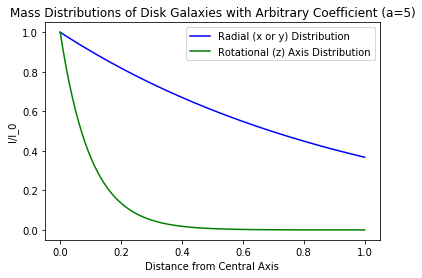

In [28]:
# create a randomized exponential
x = np.linspace(0, 1, 100)

a = 1

radial_dist = np.exp(-x/a)
z_dist = np.exp(-x/(0.1*a))

fig, ax = plt.subplots();
ax.plot(x, radial_dist,
       color='b',
       label='Radial (x or y) Distribution');
ax.plot(x, z_dist,
       color='g',
       label='Rotational (z) Axis Distribution');
ax.legend();
ax.set_xlabel('Distance from Central Axis');
ax.set_ylabel('I/I_0');
ax.set_title('Mass Distributions of Disk Galaxies with Arbitrary Coefficient (a=5)');
fig.show();

plt.savefig(f'{png_path}radial_to_rotational_mass_distributions.png');

# Energy - Virial Plot (V/K)
### 11/20 - Expectations
### 11/21 - Test plot

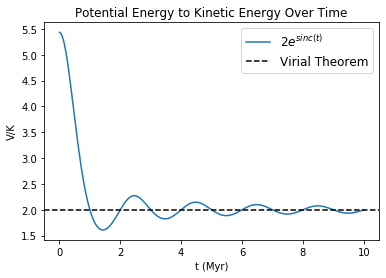

In [23]:
t = np.linspace(0,10, 200)
V_K = 2 * np.exp(np.sinc(t))

fig, ax = plt.subplots();
ax.plot(t, V_K,
       label='$2e^{sinc(t)}$');
ax.axhline(2,
          color='black',
          linestyle='--',
          label='Virial Theorem');
ax.set_xlabel('t (Myr)')
ax.set_ylabel('V/K')
ax.set_title('Potential Energy to Kinetic Energy Over Time')
ax.legend(fontsize=12)
plt.savefig(f'{png_path}virial_expectation')

Index(['step', 'total_ke'], dtype='object') Index(['step', 'total_pe'], dtype='object')
0      5.252954e+09
1      3.393226e+11
2      3.393109e+11
3      3.393277e+11
4      3.393282e+11
           ...     
96     3.408809e+11
97     3.408648e+11
98     3.408592e+11
99     3.408613e+11
100    3.409480e+11
Name: total_ke, Length: 101, dtype: float64


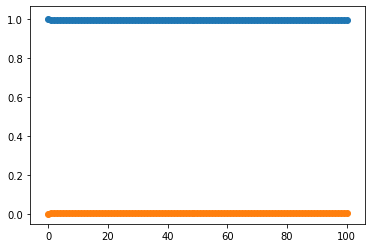

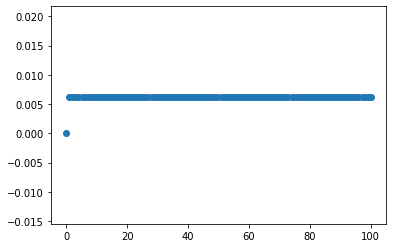

In [74]:
# 11/21/20 testing plot

test_total_ke = pd.read_csv(f'{csv_path}test/total_ke.csv')
test_total_pe = pd.read_csv(f'{csv_path}test/total_pe.csv')

print(test_total_ke.columns,
    test_total_pe.columns)

ke_step = test_total_ke.step
ke_total = test_total_ke.total_ke
pe_step = test_total_pe.step
pe_total = test_total_pe.total_pe

print(ke_total)
fig, ax = plt.subplots()
ax.scatter(ke_step, ke_total/(ke_total+pe_total))
ax.scatter(pe_step, pe_total/(ke_total+pe_total))

fig, ax = plt.subplots()
ax.scatter(ke_step, pe_total/ke_total)

# this doesn't appear to show much useful information.


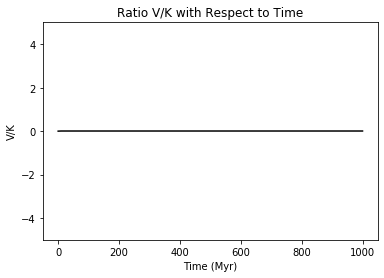

In [83]:
# 11/21 - Writing function for plotting the V/K

def plot_virial_ratio (v, k):
    # load data
    v_data = pd.read_csv(f'{csv_path}{v}.csv')
    k_data = pd.read_csv(f'{csv_path}{k}.csv')
    t = v_data.step
    v = v_data.total_pe
    k = k_data.total_ke
    v_k = v/k
    
    # plot
    fig, ax = plt.subplots();
    ax.plot(10*t, v_k,
              color='k'
              );
    ax.set_ylim(np.min(v_k) - 5, np.max(v_k) + 5);
    ax.set_ylabel('V/K')
    ax.set_xlabel('Time (Myr)')
    ax.set_title('Ratio V/K with Respect to Time');
    plt.show();
    
plot_virial_ratio('test/total_pe', 'test/total_ke')

# 11/21/20 - Showing three-dimensional structure.

In [3]:
# load a csv
step_0 = pd.read_csv(f'{csv_path}/test/pos/0.csv')
step_0.columns

Index(['particle', 'pos_x', 'pos_y', 'pos_z'], dtype='object')

-850.245674 -7233.497116 -7563.097018
-873.238474 -7232.656634999999 -7566.981428
-896.235968 -7231.764792 -7570.805418000001
-919.238413 -7230.821628 -7574.568895
-942.2463 -7229.82725 -7578.2716900000005


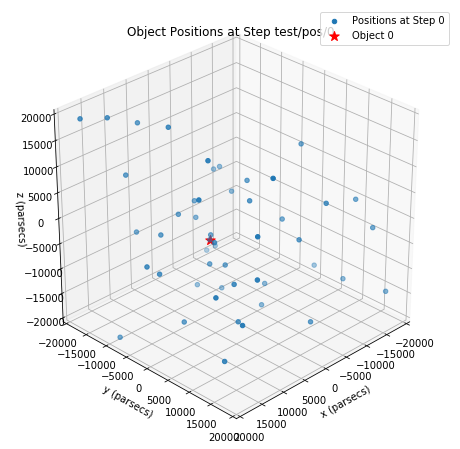

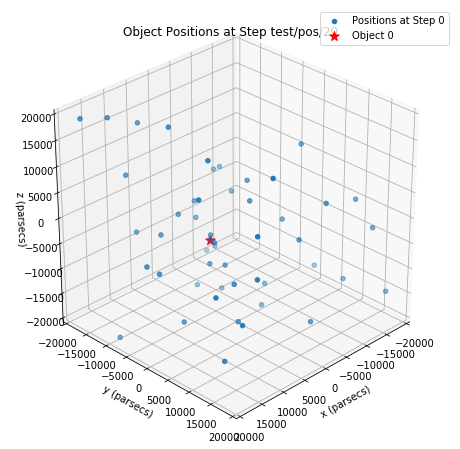

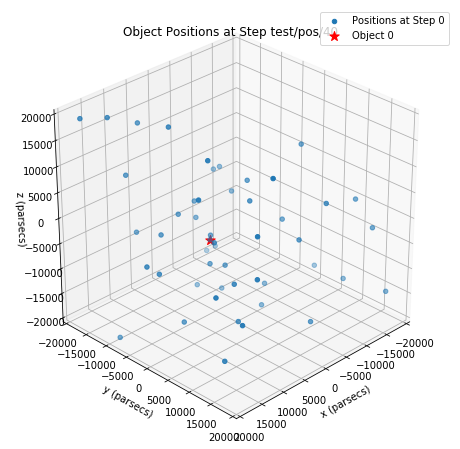

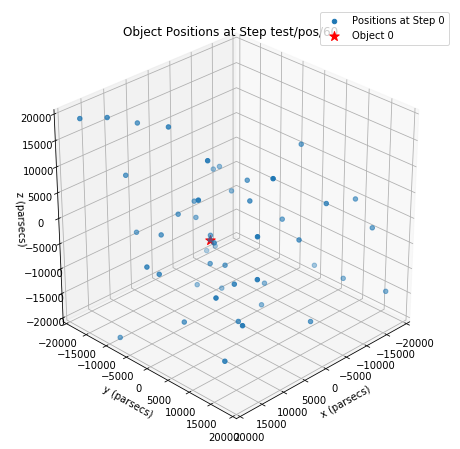

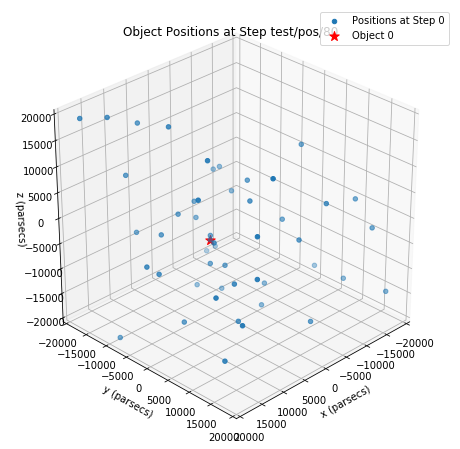

In [94]:
# function for loading and plotting
# test/pos/0 etc.
def plot_step_positions(csv_file_name):
    # load csv
    data = pd.read_csv(f'{csv_path}{csv_file_name}.csv')
    x0 = data.pos_x[0]
    y0 = data.pos_y[0]
    z0 = data.pos_z[0]
    x = data.pos_x.iloc[0:50]
    y = data.pos_y.iloc[0:50]
    z = data.pos_z.iloc[0:50]
    c = data.particle
    print(x0, y0, z0)
    
    # create 3-d plot
    fig = plt.figure(figsize=(8,8));
    ax = plt.axes(projection='3d');
    #ax.plot_surface(X=X, Y=y, Z=z, color='k', alpha=0.4)
    ax.scatter3D(xs=x, ys=y, zs=z, #c=c,
          label='Positions at Step 0',
          #cmap = "Greens"
                );
    ax.scatter3D(xs=x0, ys=y0, zs=z0,
                color='r',
                 marker='*',
                 s=100,
                label='Object 0');
    ax.set_xlabel('x (parsecs)');
    ax.set_ylabel('y (parsecs)');
    ax.set_zlabel('z (parsecs)');
    ax.set_xlim(-20000,20000)
    ax.set_ylim(-20000,20000)
    ax.set_zlim(-20000,20000)
    ax.legend();
    ax.set_title(f'Object Positions at Step {csv_file_name}');
    ax.view_init(30, 45);
    #plt.show();
    
plot_step_positions('test/pos/0')
plot_step_positions('test/pos/20')
plot_step_positions('test/pos/40')
plot_step_positions('test/pos/60')
plot_step_positions('test/pos/80')

In [90]:
step_0

,particle,pos_x,pos_y,pos_z
0,0,-850.245674,-7233.497116,-7563.097018
1,1,17772.148808,178.838466,-3363.750114
2,2,-8036.744285,2803.430280,-2245.551927
3,3,-6116.519669,14485.915708,6335.032197
4,4,19564.195685,-847.804193,-1631.519517
...,...,...,...,...
995,995,-1641.285440,12389.904477,-114.139225
996,996,-17033.600879,2161.320841,-14063.539537
997,997,19467.757195,12284.920804,-17668.385876
998,998,-7090.670492,-12574.236274,-1776.787622


# 11/25/20 - Trying to write a function to load in and plot all steps

In [15]:
# create path to specific data for sim1
sim1 = f'{csv_path}simulations_part1/'
run1 = f'{sim1}part25000_steps25000_mean010_rot010/'
run1_pos = f'{run1}pos/'

In [27]:
import os
from glob import glob


PATH = run1_pos
EXT = "*.csv"
all_csv_files = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]
print(all_csv_files)

['/home/shawn/Desktop/galaxy_sim/files/csv/simulations_part1/part25000_steps25000_mean010_rot010/pos/10000.csv', '/home/shawn/Desktop/galaxy_sim/files/csv/simulations_part1/part25000_steps25000_mean010_rot010/pos/25000.csv', '/home/shawn/Desktop/galaxy_sim/files/csv/simulations_part1/part25000_steps25000_mean010_rot010/pos/5000.csv', '/home/shawn/Desktop/galaxy_sim/files/csv/simulations_part1/part25000_steps25000_mean010_rot010/pos/3000.csv', '/home/shawn/Desktop/galaxy_sim/files/csv/simulations_part1/part25000_steps25000_mean010_rot010/pos/24000.csv', '/home/shawn/Desktop/galaxy_sim/files/csv/simulations_part1/part25000_steps25000_mean010_rot010/pos/12000.csv', '/home/shawn/Desktop/galaxy_sim/files/csv/simulations_part1/part25000_steps25000_mean010_rot010/pos/0.csv', '/home/shawn/Desktop/galaxy_sim/files/csv/simulations_part1/part25000_steps25000_mean010_rot010/pos/14000.csv', '/home/shawn/Desktop/galaxy_sim/files/csv/simulations_part1/part25000_steps25000_mean010_rot010/pos/20000.csv

In [43]:
def load_all_csv_files (directory, num_bodies):
    
    PATH = directory
    EXT = "*.csv"
    all_csv_files = [file
                     for path, subdir, files in os.walk(PATH)
                     for file in glob(os.path.join(path, EXT))]
    
    data = np.zeros( (len(all_csv_files), num_bodies, 4) )
    for i, file in enumerate(all_csv_files):
        csv = pd.read_csv(f'{file}')
        data[i] = csv  
    return(data)

run1_positions = load_all_csv_files(run1_pos, 25000)
        

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


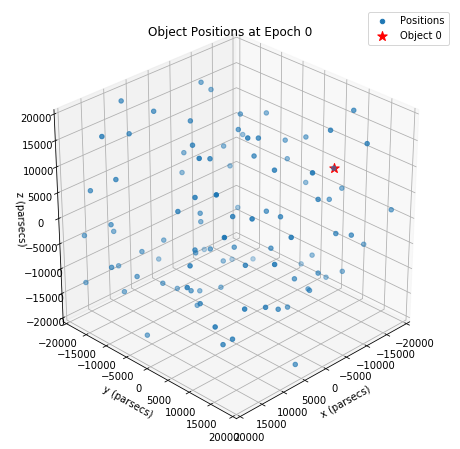

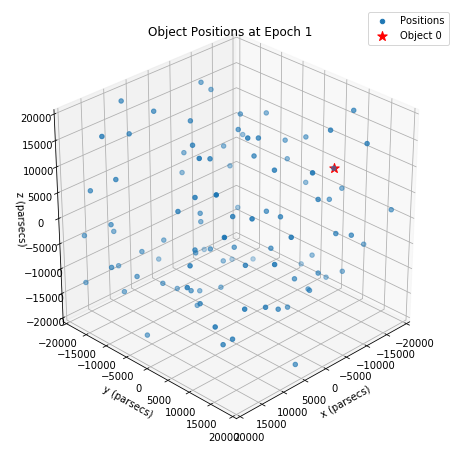

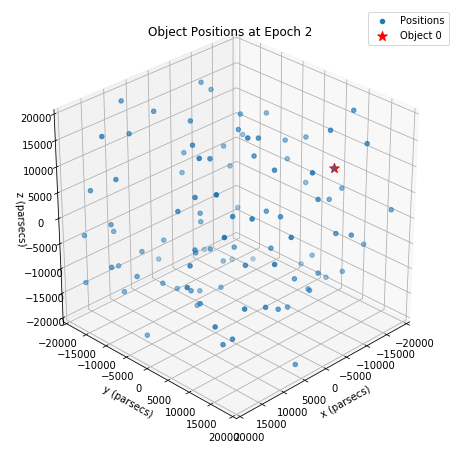

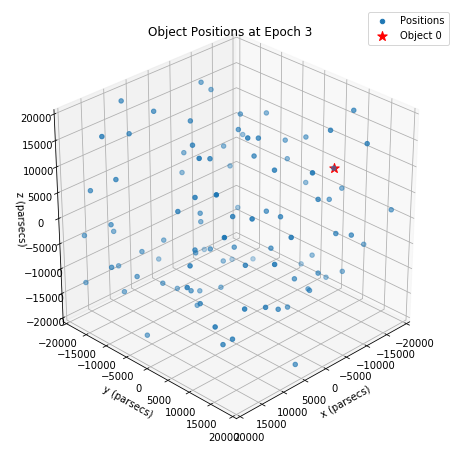

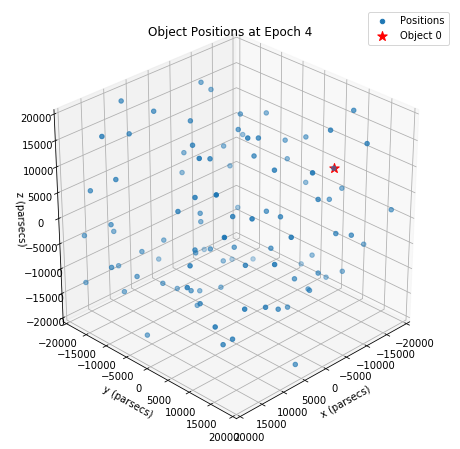

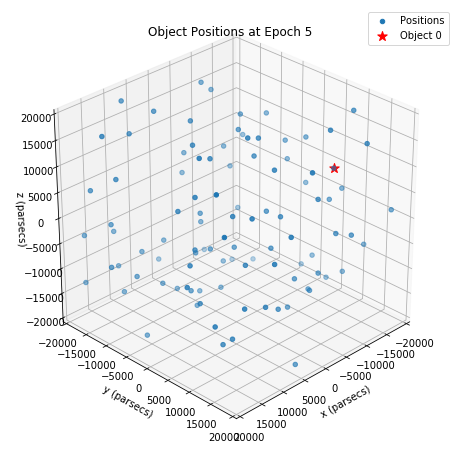

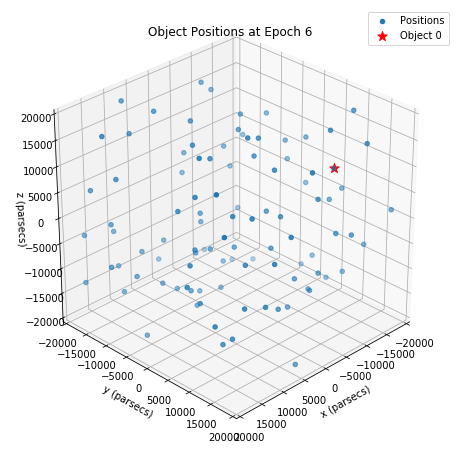

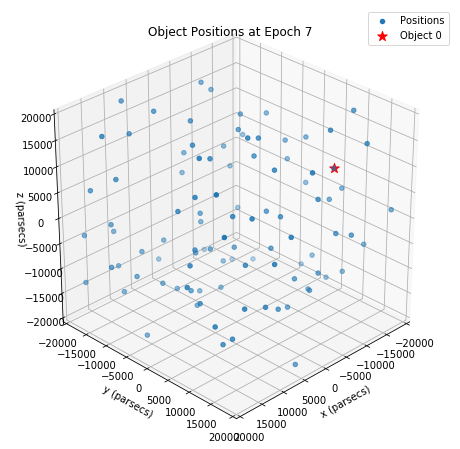

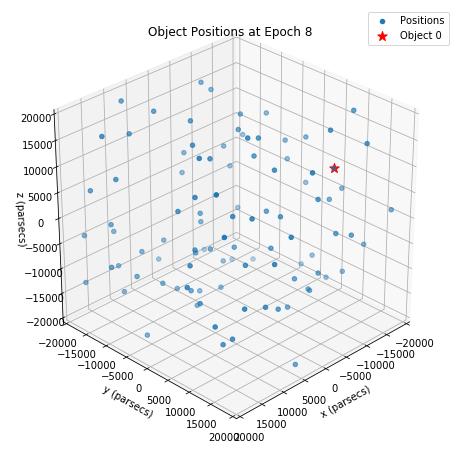

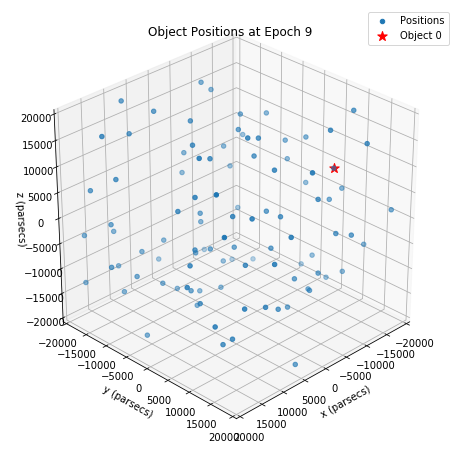

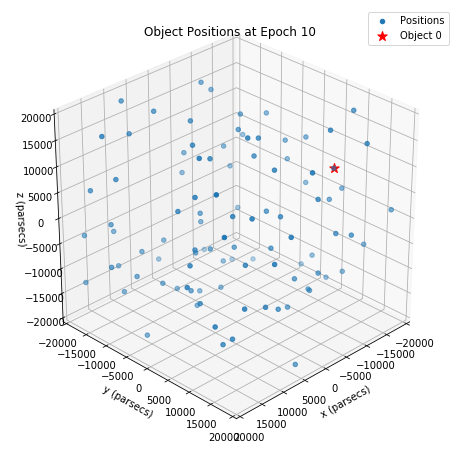

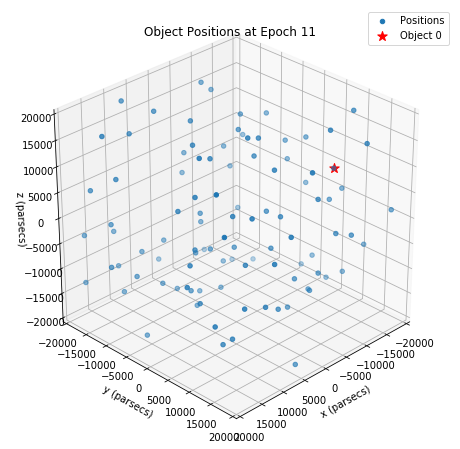

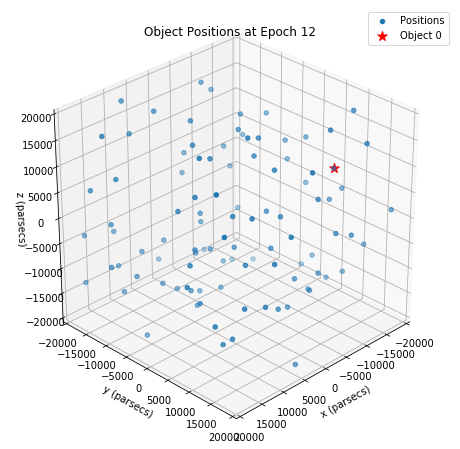

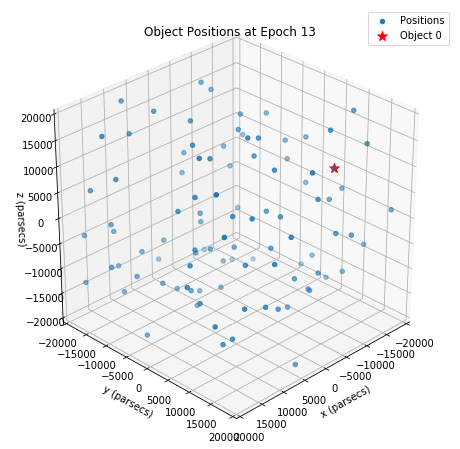

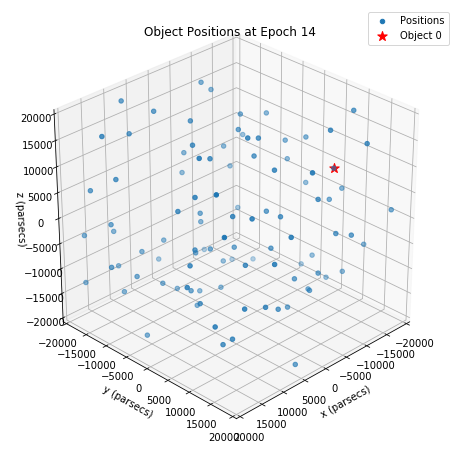

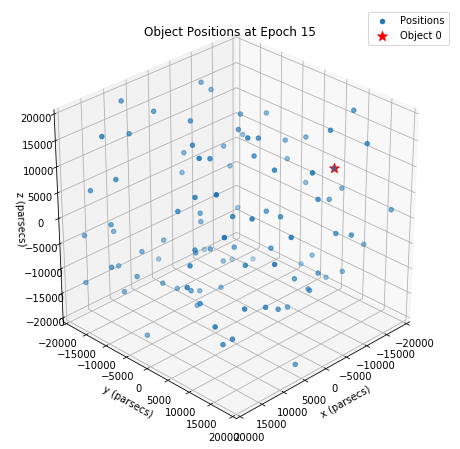

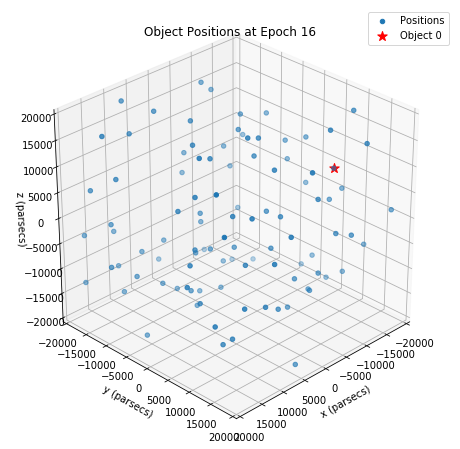

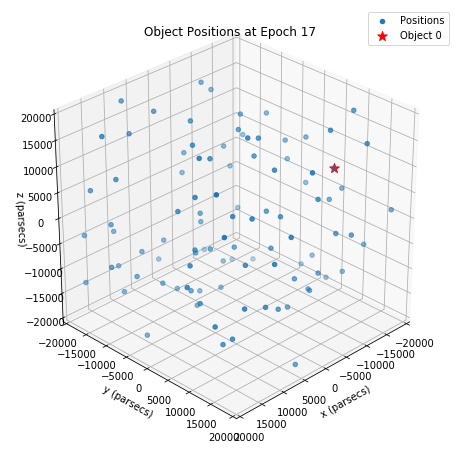

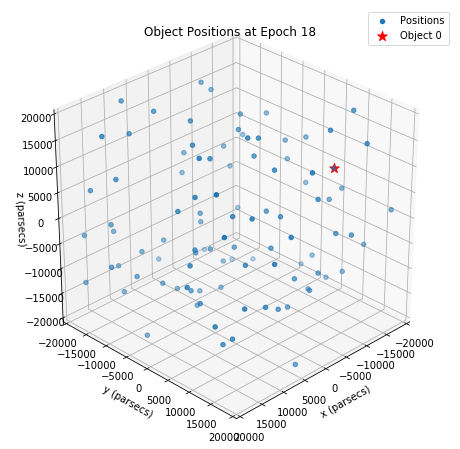

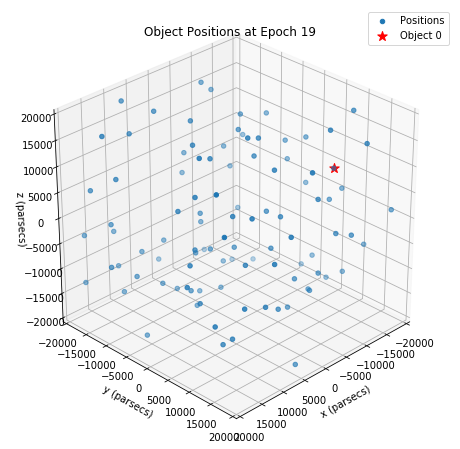

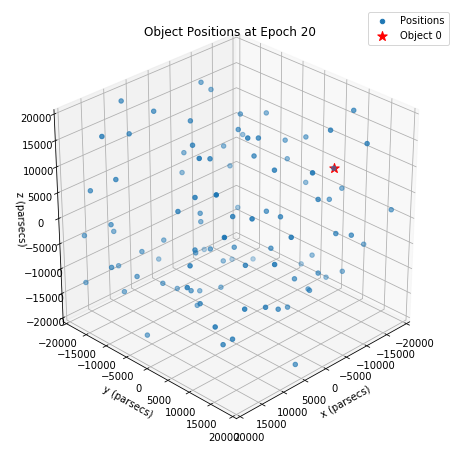

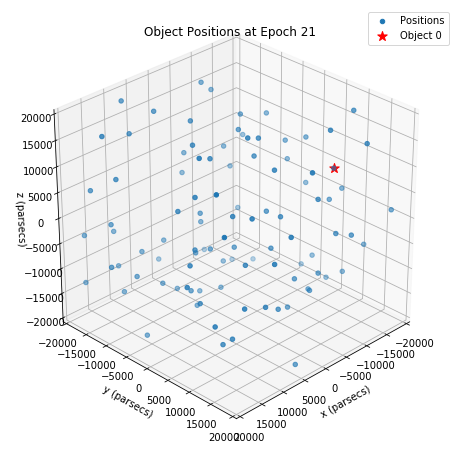

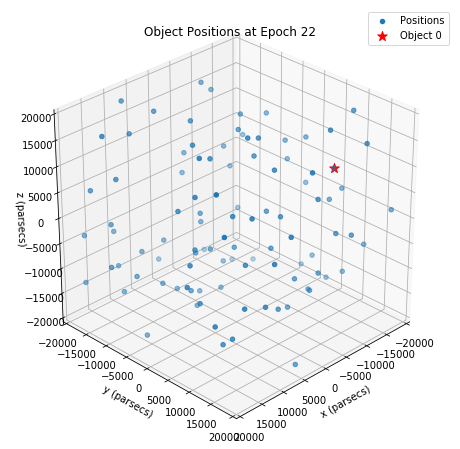

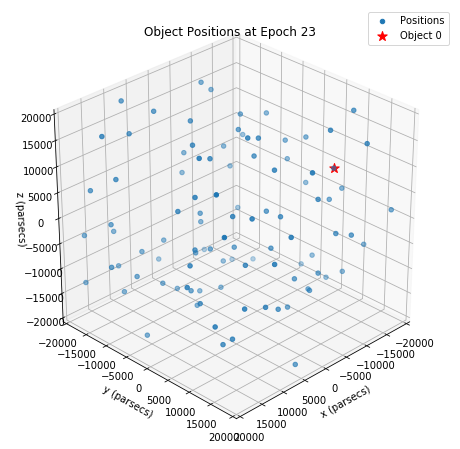

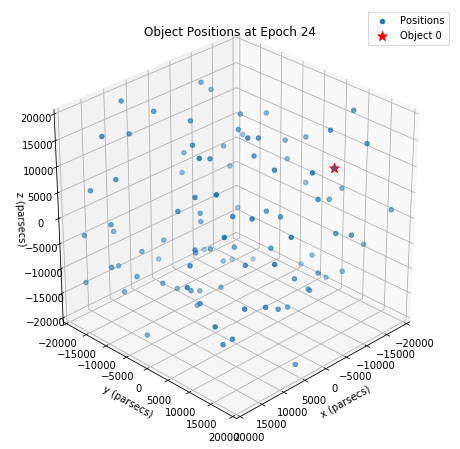

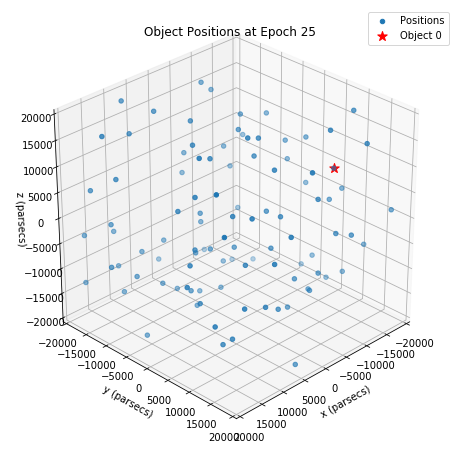

In [57]:
# plot_all_steps_positions
def plot_all_epochs_positions(run):
    for epoch in range(len(run)):
        x0 = run[epoch, 0,  1] # take first particle  
        y0 = run[epoch, 0,  2] 
        z0 = run[epoch, 0,  3] 
        x = run[epoch, :100,  1] # take first 100 particles
        y = run[epoch, :100,  2]
        z =run[epoch, :100,  3]
    
        # create 3-d plot
        fig = plt.figure(figsize=(8,8));
        ax = plt.axes(projection='3d');
        #ax.plot_surface(X=X, Y=y, Z=z, color='k', alpha=0.4)
        ax.scatter3D(xs=x, ys=y, zs=z, #c=c,
              label='Positions',
              #cmap = "Greens"
                    );
        ax.scatter3D(xs=x0, ys=y0, zs=z0,
                    color='r',
                     marker='*',
                     s=100,
                    label='Object 0');
        ax.set_xlabel('x (parsecs)');
        ax.set_ylabel('y (parsecs)');
        ax.set_zlabel('z (parsecs)');
        ax.set_xlim(-20000,20000)
        ax.set_ylim(-20000,20000)
        ax.set_zlim(-20000,20000)
        ax.legend();
        ax.set_title(f'Object Positions at Epoch {epoch}');
        ax.view_init(30, 45);
        #plt.show();
    
plot_all_epochs_positions(run1_positions)

In [ ]:
def plot_all_epochs_distributions(run, run_id):
    # make directory
    #path = os.mkdir(f'{png_path}{today}_{run_id}')
    for epoch in range(len(run)):
        x = run[epoch, :,  1] # take first 100 particles
        y = run[epoch, :,  2]
        z =run[epoch, :,  3]
        max_sizes = [np.max(abs(x)), np.max(abs(y)), np.max(abs(z))]
        hist_range = (-max(max_sizes),max(max_sizes))
        # plot three histograms
        fig, axs = plt.subplots(3, sharex=True)
        fig.tight_layout(h_pad=2)
        axs[0].hist(x,
                   bins=10,
                   range= hist_range)#, density=True)
        axs[0].set_title(f'Distributions of Positions at Epoch {epoch}')
        axs[0].set_xlabel('x')
        axs[1].hist(y,
                   bins=10,
                   range= hist_range)#, density=True)
        axs[1].set_xlabel('y')
        axs[2].hist(z,
                   bins=10,
                   range= hist_range)#, density=True)
        axs[2].set_zlabel('z (parsec)')
        plt.show()
        plt.close(fig)

# Fit exponential to histogram.

[5.01605913e+03 1.99222395e+00]


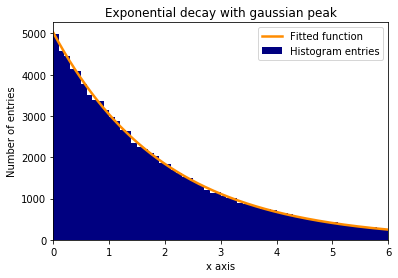

KstestResult(statistic=0.03144666666666667, pvalue=0.9999998674628067)


<Figure size 432x288 with 0 Axes>

In [33]:
# 1.) Necessary imports.    
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 2.) Define fit function.
def fit_function(x, A, beta):#, B, mu, sigma):
    return (A * np.exp(-x/beta))# + B * np.exp(-1.0 * (x - mu)**2 / (2 * sigma**2)))

# 3.) Generate exponential and gaussian data and histograms.
data = np.random.exponential(scale=2.0, size=100000)
#data2 = np.random.normal(loc=3.0, scale=0.3, size=15000)
bins = np.linspace(0, 6, 61)
data_entries_1, bins_1 = np.histogram(data, bins=bins)
#data_entries_2, bins_2 = np.histogram(data2, bins=bins)

# 4.) Add histograms of exponential and gaussian data.
data_entries = data_entries_1# + data_entries_2
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])

# 5.) Fit the function to the histogram data.
popt, pcov = curve_fit(fit_function, xdata=binscenters, ydata=data_entries
                       , p0=[100, 0.01])#, 2000, 3.0, 0.3])
print(popt)

# 6.)
# Generate enough x values to make the curves look smooth.
xspace = np.linspace(0, 6, 100000)

# Plot the histogram and the fitted function.
plt.bar(binscenters, data_entries, width=bins[1] - bins[0], color='navy', label=r'Histogram entries')
plt.plot(xspace, fit_function(xspace, *popt), color='darkorange', linewidth=2.5, label=r'Fitted function')

# Make the plot nicer.
plt.xlim(0,6)
plt.xlabel(r'x axis')
plt.ylabel(r'Number of entries')
plt.title(r'Exponential decay with gaussian peak')
plt.legend(loc='best')
plt.show()
plt.clf()

from scipy.stats import kstest
result = kstest(data_entries, fit_function(xspace, *popt))
print(result)

In [ ]:
from scipy.stats import kstest

# for I = A e ^ (-x/a)
A = np.linspace(10, 50, 100)
a = np.linspace(10, 5)
